## Take a look at samples from a previous calibration

In [42]:
good_samples = np.concatenate(
    [np.load("/home/beyerk/db/chex_calibration/results/noqe_cal_sample.npy")]
)
mask= np.ones(15, dtype=bool)
mask[6] = False
good_starting_point = np.mean(good_samples[:, mask], axis=0)
good_ssample_stdev = np.std(good_samples[:, mask], axis=0)

In [43]:
good_starting_point[6:8] *= good_starting_point[0]

In [44]:
good_ssample_stdev[6:8] *= good_starting_point[0]

In [45]:
for p, x0, p0 in zip(elm.params, good_starting_point, mean):
    print(f"{p.name:10}: {x0:1.2f}     prior: {p0:1.2f}  bounds: {p.bounds}")

V0        : 54.82     prior: 56.19  bounds: (30, 80)
W0        : 11.18     prior: 9.92  bounds: (0, 30)
Wd0       : 28.86     prior: 10.59  bounds: (20, 50)
V1        : 20.08     prior: 13.82  bounds: (0, 60)
W1        : 10.29     prior: 0.00  bounds: (-10, 60)
Wd1       : 18.35     prior: 27.09  bounds: (-10, 60)
alpha     : -0.30     prior: -0.36  bounds: (-0.4, -0.3)
beta      : -0.00     prior: -0.00  bounds: (-0.01, 0.01)
gamma_w   : 44.83     prior: 20.00  bounds: (10, 60)
gamma_d   : 26.99     prior: 50.00  bounds: (10, 60)
r0A       : 1.20     prior: 1.20  bounds: (0.9, 1.5)
r1A       : 1.40     prior: 1.20  bounds: (0.9, 1.5)
a0        : 0.69     prior: 0.73  bounds: (0.4, 1.0)
a1        : 0.51     prior: 0.73  bounds: (0.4, 1.0)


In [46]:
projectile = (1,1)
target = (208,82)

In [47]:
(centr_isosc, centr_isov, so_isosc, so_isov, coul, asym) = elm.calculate_parameters(
   projectile, target, 11.9, 0, *good_starting_point
)

In [48]:
from elm import model_form

In [49]:
from elm import elm_og

In [50]:
(centr_isosc_og, centr_isov_og, so_og, coul_og, asym_og) = elm_og.el_model_params(
    projectile, *target, 11.9, np.mean(good_samples, axis=0)
)

In [51]:
so_og

(5.58, np.float64(7.129752821626306), np.float64(0.6879353900729821))

In [52]:
from matplotlib import pyplot as plt

In [53]:
r = np.linspace(0, 10, 100)
vc = model_form.central(r,  asym, centr_isosc, centr_isov)
vso = model_form.spin_orbit(r, asym, so_isosc, so_isov)

/home/beyerk/Projects/jitr/src/jitr/optical_potentials/potential_forms.py:56: RuntimeWarning: divide by zero encountered in divide
  y = 1.0 / r
/home/beyerk/Projects/elm/src/elm/model_form.py:19: RuntimeWarning: invalid value encountered in multiply
  return (Vso + 1j * Wso) / WAVENUMBER_PION ** 2 * thomas_safe(r, R, a)


In [54]:
vc_og = elm_og.elm_spin_scalar(r, projectile, asym_og, centr_isosc_og, centr_isov_og)
vso_og = elm_og.elm_so(r, *so_og)

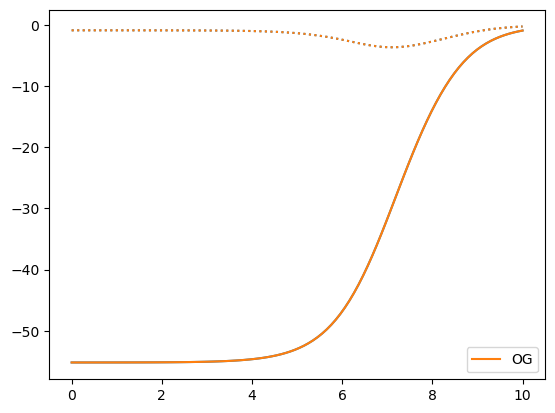

In [55]:
p, = plt.plot(r, vc.real)
plt.plot(r, vc.imag, ":", color=p.get_color())
p, = plt.plot(r, vc_og.real, label="OG")
plt.plot(r, vc_og.imag, ":", color=p.get_color())
plt.legend()

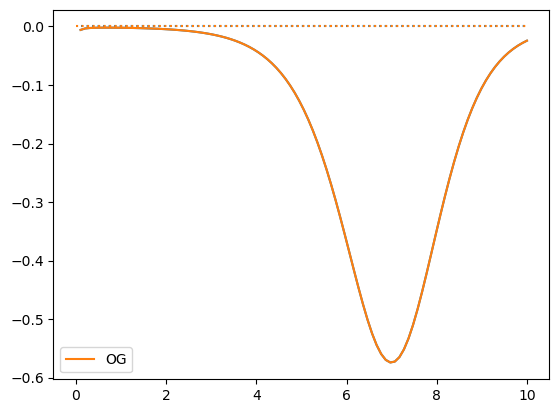

In [56]:
p, = plt.plot(r, vso.real)
plt.plot(r, vso.imag, ":", color=p.get_color())
p, = plt.plot(r, vso_og.real, label="OG")
plt.plot(r, vso_og.imag, ":", color=p.get_color())
plt.legend()

In [57]:
centr_isosc

(np.float64(51.220740157168215),
 np.float64(0.7357857271352961),
 np.float64(3.021951060696157),
 np.float64(7.129752821626309),
 np.float64(0.6879353900729811),
 np.float64(7.129752821626309),
 np.float64(0.6879353900729811))

In [58]:
centr_isov

(np.float64(18.762824017383497),
 np.float64(0.677079805825894),
 np.float64(1.9214435221022446),
 np.float64(8.31306430869349),
 np.float64(0.5068281135880842),
 np.float64(8.31306430869349),
 np.float64(0.5068281135880842))

In [59]:
centr_isov_og

(np.float64(18.762824017383508),
 np.float64(0.6770798058258877),
 np.float64(1.9214435221022463),
 np.float64(8.313064308693487),
 np.float64(0.506828113588085))

In [65]:
asym_og

0.21153846153846154

In [66]:
asym

0.21153846153846154